In [14]:
from manifold_learning import IMD, CCM
import numpy as np
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import load_csv_dataset,get_truncated_lorenz_rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import importlib
importlib.reload(IMD)
importlib.reload(CCM)
importlib.reload(utils)

<module 'manifold_learning.utils.utils' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/utils/utils.py'>

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [3]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [4]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [5]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

Epoch 1/1, Loss: 1.2958
Epoch 1/1, Loss: 1.2406
Epoch 1/1, Loss: 1.2077
Epoch 1/1, Loss: 1.1846
Epoch 1/1, Loss: 1.1639
Epoch 1/1, Loss: 1.1444
Epoch 1/1, Loss: 1.1265
Epoch 1/1, Loss: 1.1097
Epoch 1/1, Loss: 1.0911
Epoch 1/1, Loss: 1.0769
Epoch 1/1, Loss: 1.0585
Epoch 1/1, Loss: 1.0404
Epoch 1/1, Loss: 1.0238
Epoch 1/1, Loss: 1.0062
Epoch 1/1, Loss: 0.9873
Epoch 1/1, Loss: 0.9673
Epoch 1/1, Loss: 0.9505
Epoch 1/1, Loss: 0.9333
Epoch 1/1, Loss: 0.9108
Epoch 1/1, Loss: 0.8927
Epoch 1/1, Loss: 0.8759
Epoch 1/1, Loss: 0.8550
Epoch 1/1, Loss: 0.8390
Epoch 1/1, Loss: 0.8215
Epoch 1/1, Loss: 0.8073
Epoch 1/1, Loss: 0.7919
Epoch 1/1, Loss: 0.7729
Epoch 1/1, Loss: 0.7608
Epoch 1/1, Loss: 0.7435
Epoch 1/1, Loss: 0.7312
Epoch 1/1, Loss: 0.7167
Epoch 1/1, Loss: 0.7046
Epoch 1/1, Loss: 0.6927
Epoch 1/1, Loss: 0.6768
Epoch 1/1, Loss: 0.6681
Epoch 1/1, Loss: 0.6527
Epoch 1/1, Loss: 0.6420
Epoch 1/1, Loss: 0.6322
Epoch 1/1, Loss: 0.6201
Epoch 1/1, Loss: 0.6114
Epoch 1/1, Loss: 0.5986
Epoch 1/1, Loss:

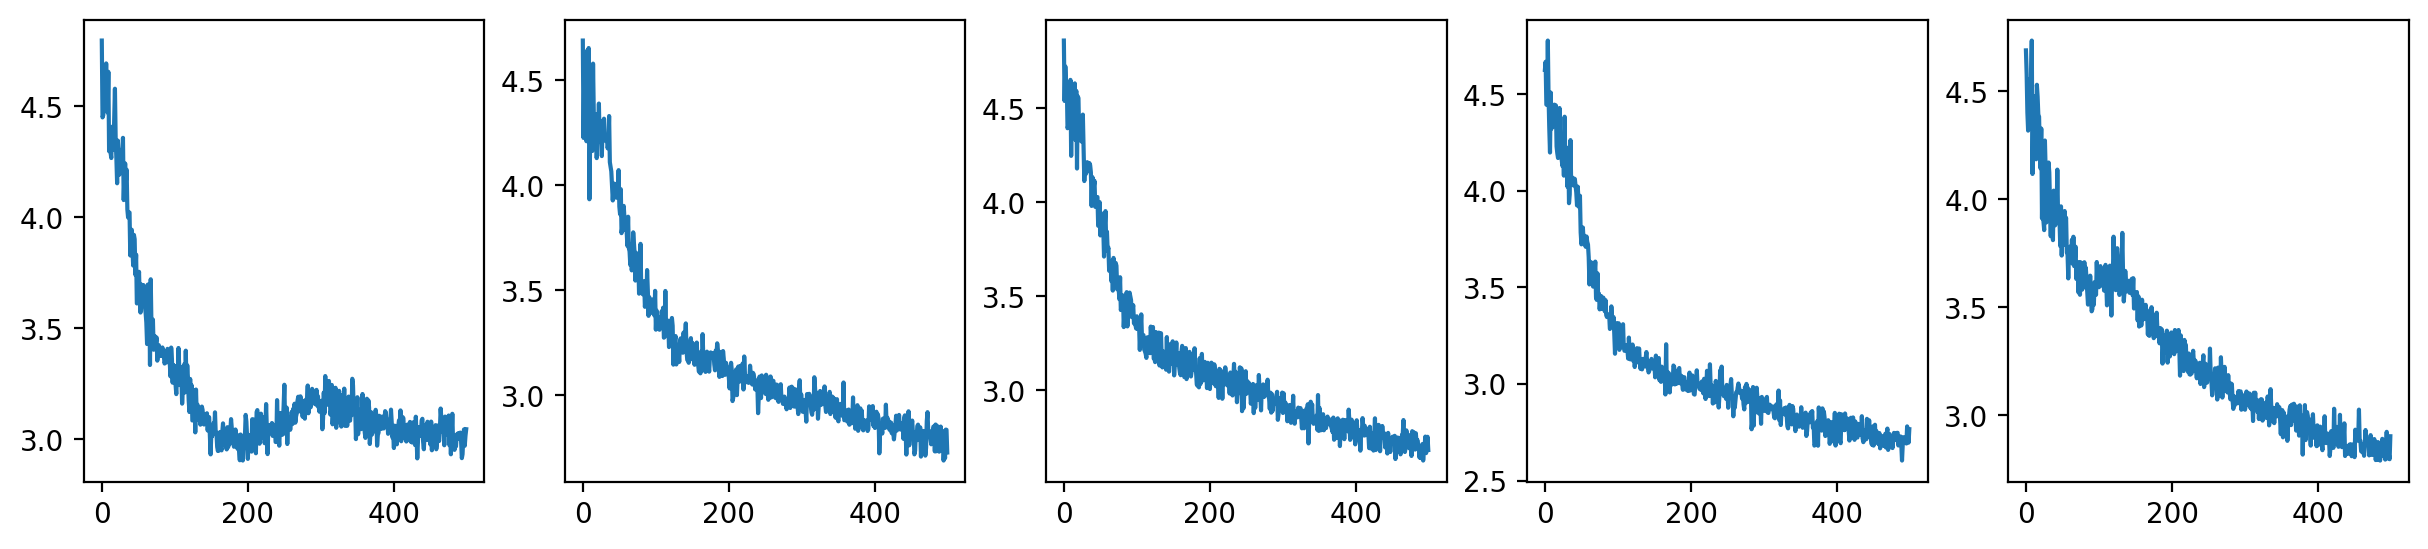

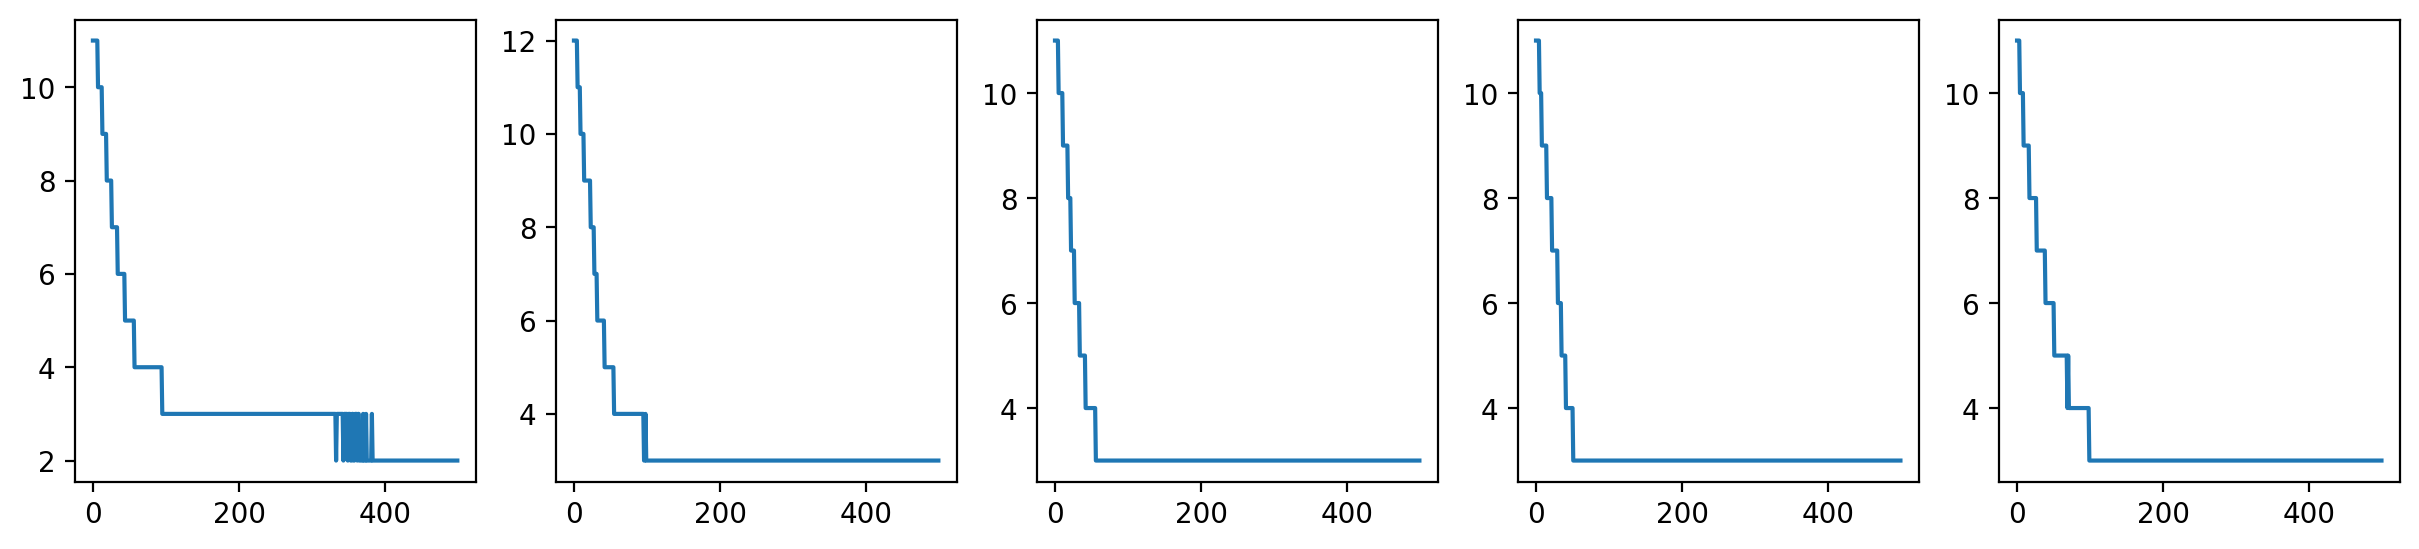

In [20]:
trainer = IMD.IMD_nD(observables.shape[1], embed_dim=15, n_components=5,subtract_corr=True, device="cuda")

corr_dims = []
ranks = []


for i in range(500):
    trainer.fit(observables, sample_len=400, library_len=1200, 
                exclusion_rad=20, nbrs_num=30, tp=20, 
                epochs=1, num_batches=32,optimizer="Adagrad", learning_rate=0.002,tp_policy="fixed")
    unmixed = trainer.predict(observables)
    corr_dims += [[utils.calculate_correlation_dimension(unmixed[np.random.randint(0,unmixed.shape[0],1000),i],device="cuda") for i in range(unmixed.shape[1])]]
    ranks += [[utils.calculate_rank_for_variance(unmixed[np.random.randint(0,unmixed.shape[0],5000),i],0.975) for i in range(unmixed.shape[1])]]
corr_dims = np.array(corr_dims)
ranks = np.array(ranks)

plt.figure(figsize=(3*unmixed.shape[1],3),dpi=200)
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    plt.plot(corr_dims[:,i])

plt.figure(figsize=(3*unmixed.shape[1],3),dpi=200)
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    plt.plot(ranks[:,i])

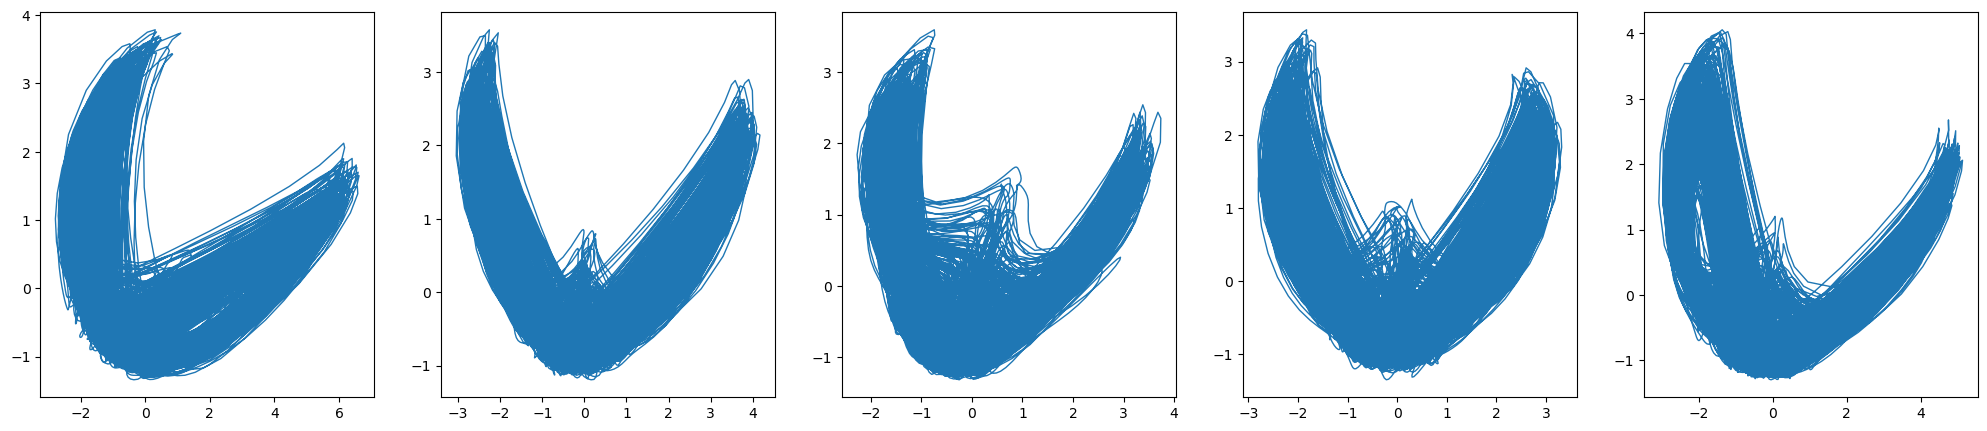

In [21]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)